In [1]:
import cv2
import matplotlib.pyplot as plt

# Helper function
def cv2_imshow(image,color='rgb'):
    color_mode_dct = {'rgb' :cv2.COLOR_BGR2RGB, # This is becasue the default im reader for cv2 is BGR not RGB
                      'gray' : cv2.COLOR_RGB2BGR }
    
    color_mode = color_mode_dct[color]
    image = cv2.cvtColor(image,color_mode)
    plt.imshow(image)
    plt.show()

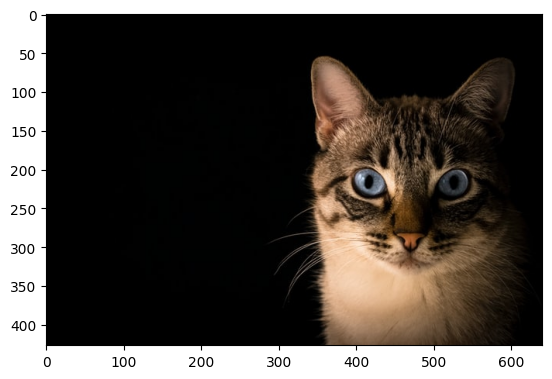

In [2]:
img = cv2.imread('images/Photos/cat.jpg') # This return array
cv2_imshow(img)

## Resize image

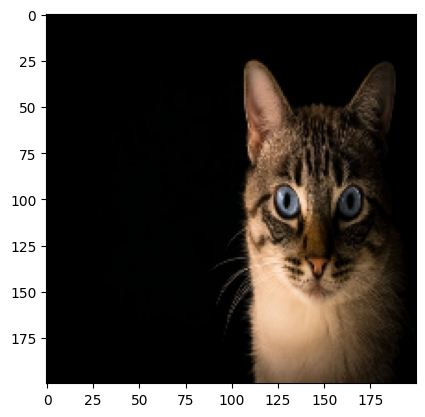

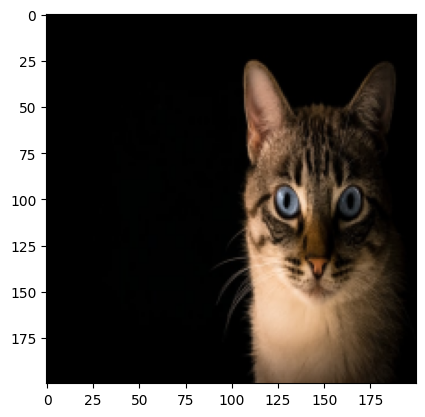

In [3]:
# Resize image
img_resize = cv2.resize(img,(200,200))
cv2_imshow(img_resize)
del img_resize

# Resize image
img_resize = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
cv2_imshow(img_resize)

## Draw Stuff (Rectangle, Circle, Line, Text)

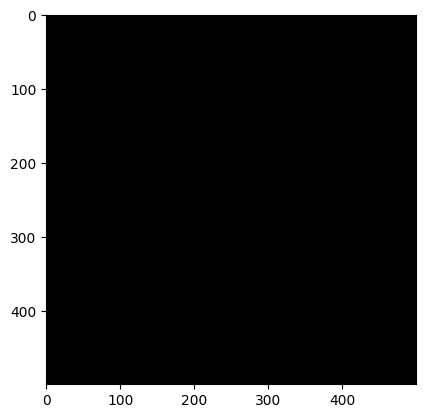

In [4]:
import numpy as np

blank_img = np.zeros((500,500,3), dtype='uint8')
cv2_imshow(blank_img)

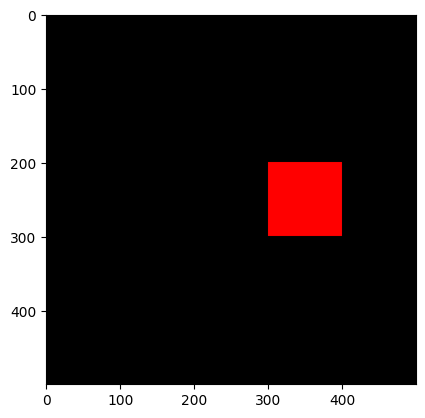

In [5]:
blank_img[200:300,300:400] = (0,0,255) # Red
cv2_imshow(blank_img)

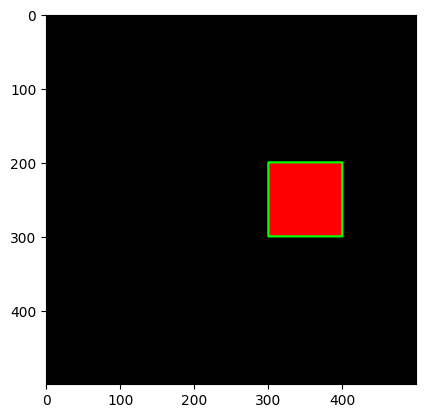

In [6]:
# rectangle is a method, this will modify blank_img
cv2.rectangle(blank_img,
              pt1 = (300,200),
              pt2 = (400,300),
              color = (0,255,0),
              thickness=2) 

cv2_imshow(blank_img)

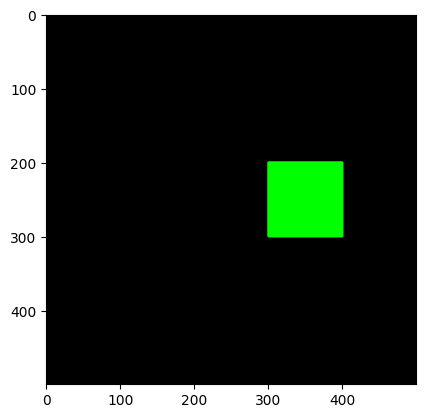

In [7]:
# This fill the rectangle
cv2.rectangle(blank_img,
              pt1 = (300,200),
              pt2 = (400,300),
              color = (0,255,0),
              thickness=cv2.FILLED) # alternative : thickness=-1

cv2_imshow(blank_img)

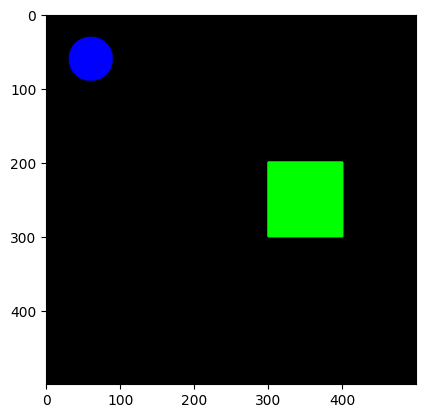

In [8]:
# Circle
cv2.circle(blank_img,
           center = (60,60),
           radius = 30,
           color = (255,0,0),
           thickness=cv2.FILLED) # alternative : thickness=-1

cv2_imshow(blank_img)

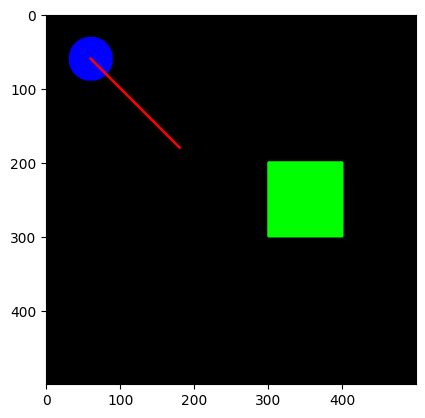

In [9]:
# Line
cv2.line(blank_img,
         pt1 = (60,60),
         pt2 = (180,180),
         color = (0,0,255),
         thickness=3) 

cv2_imshow(blank_img)

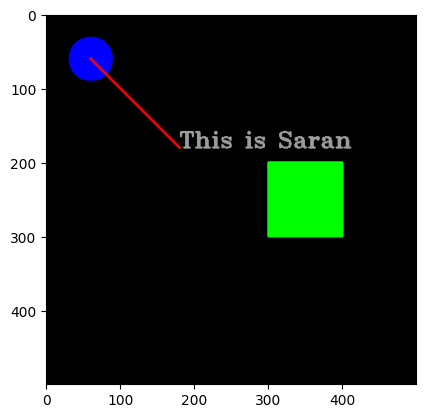

In [10]:
# Line
cv2.putText(blank_img,
         text = "This is Saran",
         org = (180,180), #origin
         fontFace=cv2.FONT_HERSHEY_TRIPLEX,
         fontScale=1.0,
         color = (155,155,155),
         thickness=2) 

cv2_imshow(blank_img)

## 5 Basic Preprocess function

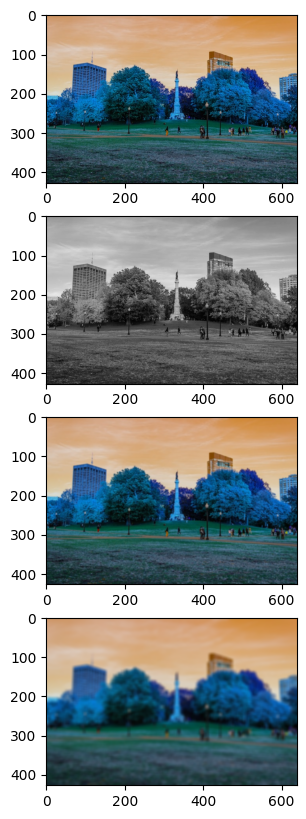

In [36]:
# Original
img = cv2.imread('images/Photos/park.jpg')

# Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # cvt : convert

# Blur (Help remove noise)
blur = cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT)
very_blur = cv2.GaussianBlur(img,(11,11),cv2.BORDER_DEFAULT) #increase kernel size to blur more

fig, ax = plt.subplots(4, 1, figsize=(20, 10))
ax[0].imshow(img)
ax[1].imshow(gray,'gray')
ax[2].imshow(blur)
ax[3].imshow(very_blur)
plt.show()

## Edge detection

- We will prove that why blur help removing noise 

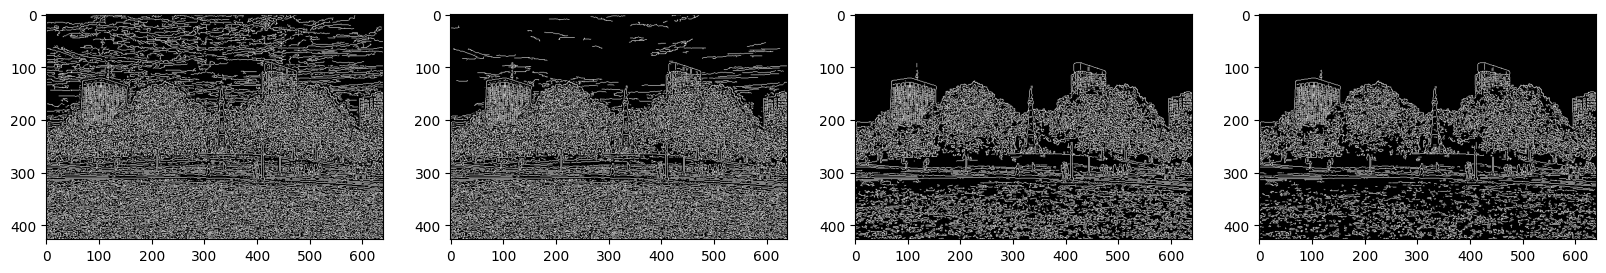

In [37]:
canny = cv2.Canny(img,threshold1 = 0,threshold2 = 25)
canny2 = cv2.Canny(img,threshold1 = 25,threshold2 = 50)
canny3 = cv2.Canny(img,threshold1 = 100,threshold2 = 150)
canny4 = cv2.Canny(img,threshold1 = 125,threshold2 = 175)

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(canny,'gray')
ax[1].imshow(canny2,'gray')
ax[2].imshow(canny3,'gray')
ax[3].imshow(canny4,'gray')
plt.show()

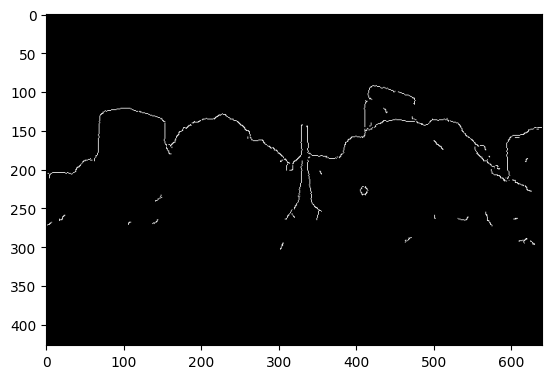

In [41]:
# Compare with blur

canny = cv2.Canny(very_blur,threshold1 = 100,threshold2 = 125)

cv2_imshow(canny)

# Only strong edge can be detected

In [ ]:
# We called this Structural element

## Dilation : Make your edge become clearer

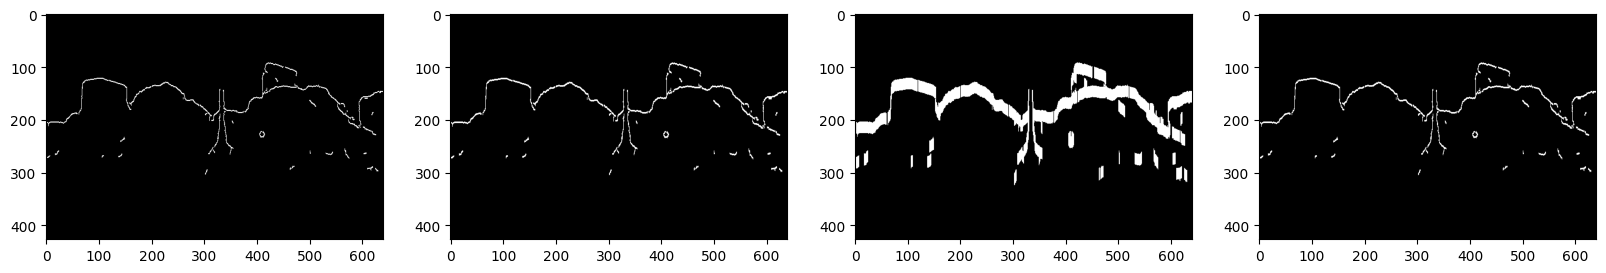

In [51]:
# Compare with blur

dilated = cv2.dilate(canny,(3,3),iterations=1)
dilated2 = cv2.dilate(canny,(3,3),iterations=20) # Repeat dilate this 20 times
dilated3 = cv2.dilate(canny,(21,21),iterations=1)

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(canny,'gray')
ax[1].imshow(dilated,'gray')
ax[2].imshow(dilated2,'gray')
ax[3].imshow(dilated3,'gray')
plt.show()

# Only strong edge can be detected

## Eroding (Opposite of dilate)

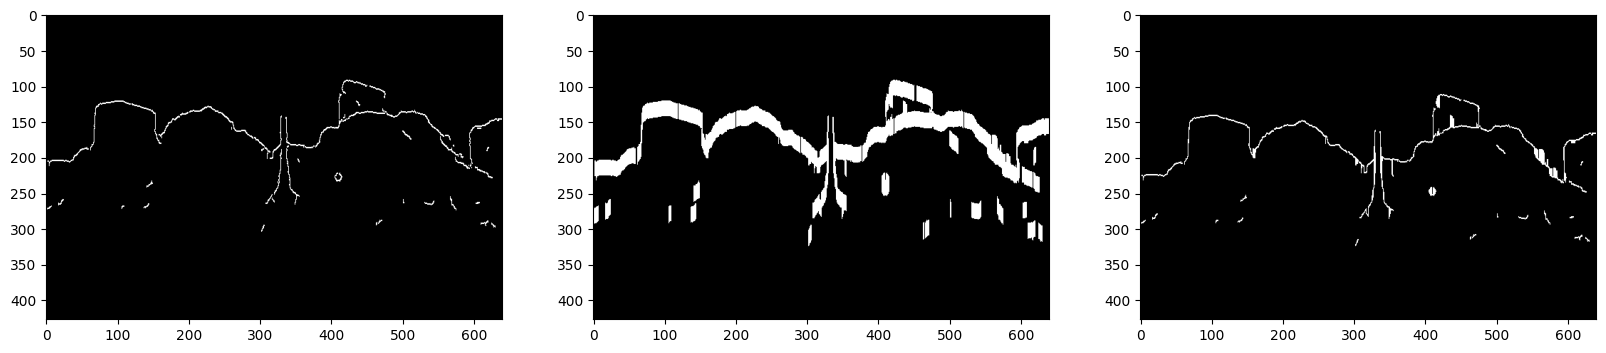

In [55]:
eroded2 = cv2.erode(dilated2,(3,3),iterations=20)
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(canny,'gray')
ax[1].imshow(dilated2,'gray')
ax[2].imshow(eroded2,'gray')
plt.show()

# Dilate + Erode = 0

## Resize (Advanced)
Good rule of thumb :
1. shrink -> cv2.INTER_AREA
2. enlarge -> cv2.INTER_LINEAR or cv2.INTER_CUBIC

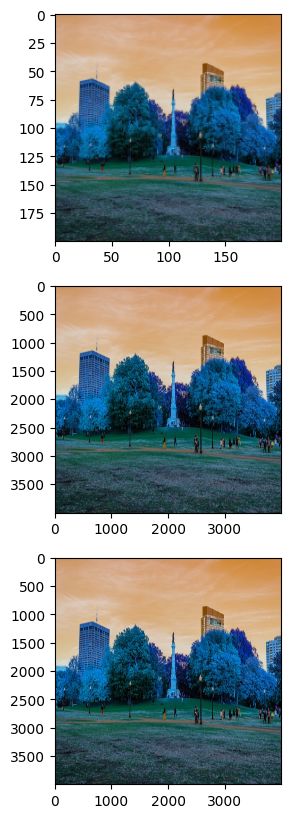

In [60]:
shrink = cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
enlarge_bad = cv2.resize(img,(4000,4000),interpolation=cv2.INTER_AREA)
enlarge = cv2.resize(img,(4000,4000),interpolation=cv2.INTER_CUBIC)

fig, ax = plt.subplots(3,1, figsize=(20, 10))

ax[0].imshow(shrink)
ax[1].imshow(enlarge_bad)
ax[2].imshow(enlarge)

plt.show()

## Crop

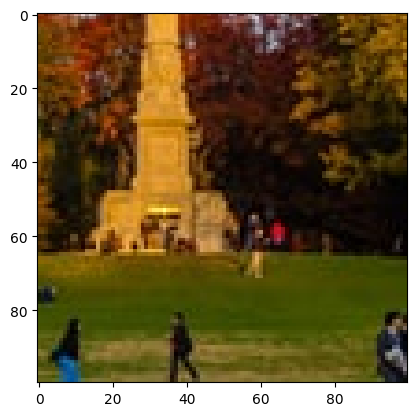

In [62]:
crop = img[200:300,300:400]
cv2_imshow(crop)

## Translate Image

In [68]:
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv2.warpAffine(img,transMat,dimensions) #Applies an Affine Transform to the image

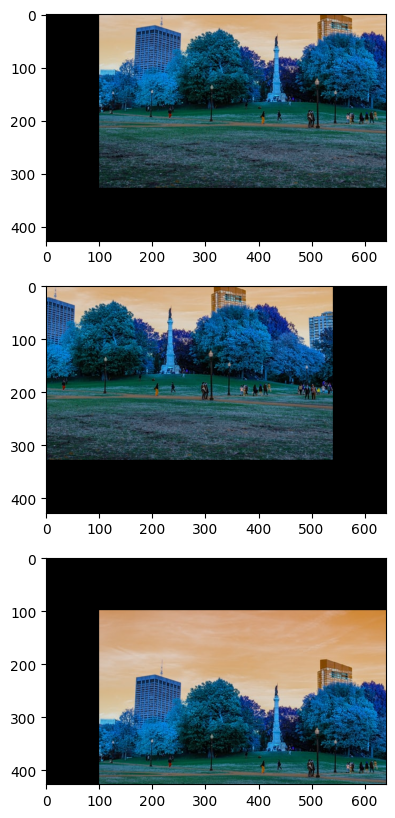

In [70]:
translated = translate(img,100,-100) # Move right 100 , Move up 100
translated2 = translate(img,-100,-100)# Move left 100, Move up 100
translated3 = translate(img,100,100) # Move right 100, Move down 100

fig, ax = plt.subplots(3,1, figsize=(20, 10))

ax[0].imshow(translated)
ax[1].imshow(translated2)
ax[2].imshow(translated3)

plt.show()

## Rotate Image

- 45, 90 or any degree

In [83]:
def rotate(img, angle, rotPoint=None):
    h = img.shape[0]
    w = img.shape[1]
    dimensions = w, h
    # If no rotation point is specified, we will use center point
    if rotPoint is None:
        rotPoint = (w//2,h//2)
    
    rotMat = cv2.getRotationMatrix2D(rotPoint,angle,1.0) # We do not scale=, so scale = 1.0
    return cv2.warpAffine(img,rotMat,dimensions)

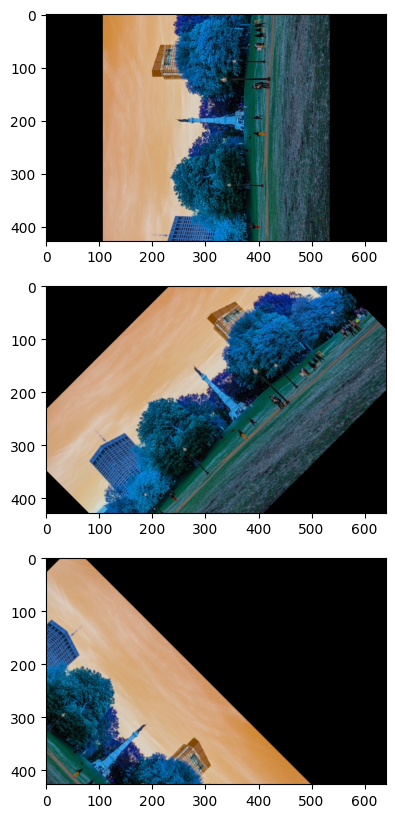

In [85]:
rotated = rotate(img, 90)
rotated2 = rotate(img, 45)
rotated3 = rotate(img, -45, (50,50))

fig, ax = plt.subplots(3,1, figsize=(20, 10))

ax[0].imshow(rotated)
ax[1].imshow(rotated2)
ax[2].imshow(rotated3)

## Flip

- Vertically, or horizontally

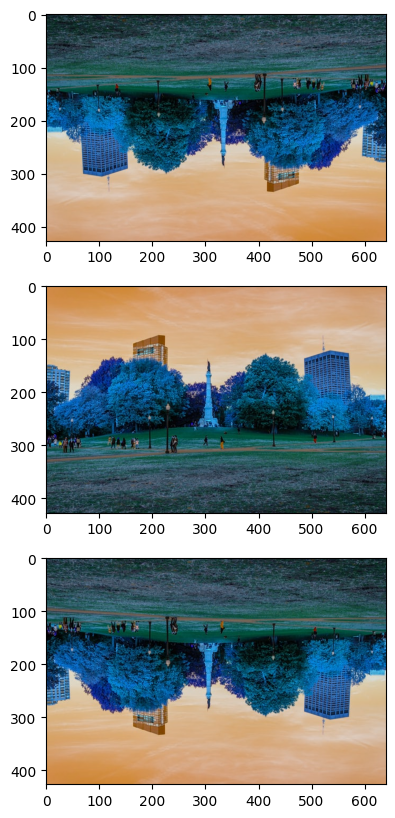

In [98]:
flip_h = cv2.flip(img,flipCode=0)
flip_v = cv2.flip(img,flipCode=1)
flip_both = cv2.flip(img,flipCode=-1)

fig, ax = plt.subplots(3,1, figsize=(20, 10))

ax[0].imshow(flip_h)
ax[1].imshow(flip_v)
ax[2].imshow(flip_both)
plt.show()